In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
print(os.listdir("../7/input")) # or "./input"

['column_2C_weka.csv', 'column_3C_weka.csv', 'kmeans01.png', 'sample_submission.csv', 'test.csv', 'train.csv', 'X.npy', 'Y.npy']


In [2]:
array = [[1,2,3],[4,5,6]]
first_array = np.array(array) # 2x3 array
print("Array Type: {}".format(type(first_array))) # type
print("Array Shape: {}".format(np.shape(first_array))) # or first_array.shape
print(first_array)

Array Type: <class 'numpy.ndarray'>
Array Shape: (2, 3)
[[1 2 3]
 [4 5 6]]


In [3]:
import torch
tensor = torch.tensor(array)
print("Array Type: {}".format(tensor.type)) # type
print("Array Shape: {}".format(tensor.shape)) # shape
print(tensor)

Array Type: <built-in method type of Tensor object at 0x0000014CFD07C340>
Array Shape: torch.Size([2, 3])
tensor([[1, 2, 3],
        [4, 5, 6]])


In [13]:
print("Numpy {}\n".format(np.ones((2,3))))

print(torch.ones([2,3])) # (2,3) or [2,3]

Numpy [[1. 1. 1.]
 [1. 1. 1.]]

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [25]:
print("Numpy {}\n".format(np.random.rand(2,3))) 
# uniform distribution over ``[0, 1)

print(torch.rand(2,3)) 

Numpy [[0.11389929 0.6474477  0.74989048]
 [0.4595309  0.15898858 0.53281459]]

tensor([[0.8104, 0.6896, 0.1775],
        [0.2992, 0.5366, 0.5908]])


In [41]:
array = np.random.rand(2,2)
print("{} {}\n".format(type(array),array))

from_numpy_to_tensor = torch.from_numpy(array)
print("{}\n".format(from_numpy_to_tensor))

tensor = from_numpy_to_tensor
from_tensor_to_numpy = tensor.numpy()
print("{} {}\n".format(type(from_tensor_to_numpy),from_tensor_to_numpy))

<class 'numpy.ndarray'> [[0.54441118 0.50558044]
 [0.14179095 0.25482488]]

tensor([[0.5444, 0.5056],
        [0.1418, 0.2548]], dtype=torch.float64)

<class 'numpy.ndarray'> [[0.54441118 0.50558044]
 [0.14179095 0.25482488]]



In [10]:
a = torch.FloatTensor([1,2,3])
print(a.item())

ValueError: only one element tensors can be converted to Python scalars

In [9]:
a = torch.FloatTensor([1,2,3,4])
print(a.numpy())

[1. 2. 3. 4.]


In [43]:
tensor = torch.ones(3,3)
print("\n",tensor)

# Resize
print("{}{}\n".format(tensor.view(9).shape,tensor.view(9)))

# Addition
print("Addition: {}\n".format(torch.add(tensor,tensor)))

# Subtraction
print("Subtraction: {}\n".format(tensor.sub(tensor)))

# Element wise multiplication , 행렬원소별 곱셈, 행렬곱 > torch.matmul or @
print("Element wise multiplication: {}\n".format(torch.mul(tensor,tensor)))

# Element wise division 
print("Element wise division: {}\n".format(torch.div(tensor,tensor)))

tensor = torch.Tensor([1,2,3,4,5])
print("Mean: {}".format(tensor.mean()))

print("std: {}".format(tensor.std()))


 tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
torch.Size([9])tensor([1., 1., 1., 1., 1., 1., 1., 1., 1.])

Addition: tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])

Subtraction: tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

Element wise multiplication: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

Element wise division: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

Mean: 3.0
std: 1.5811388492584229


In [64]:
torch.__version__

'1.9.0'

In [69]:
from torch.autograd import Variable
var = Variable(torch.ones(3), requires_grad = True)
var # 현 버젼에서 쓰지 않음 

tensor([1., 1., 1.], requires_grad=True)

In [11]:
# we have an equation that is y = x^2
array = [2,4]
#ensor = torch.Tensor(array)        ##### Variable deprecate
# = Variable(tensor, requires_grad = True) 
x = torch.tensor(array, requires_grad=True, dtype = torch.float64)
y = x**2+
print(" y =  ",y)

# recap o equation o = 1/2*sum(y)
o = (1/2)*sum(y)
print(" o =  ",o)

# backward
o.backward() # calculates gradients

# As I defined, variables accumulates gradients. In this part there is only one variable x.
# Therefore variable x should be have gradients
# Lets look at gradients with x.grad
print("gradients: ",x.grad)

 y =   tensor([ 4., 16.], dtype=torch.float64, grad_fn=<PowBackward0>)
 o =   tensor(10., dtype=torch.float64, grad_fn=<MulBackward0>)
gradients:  tensor([2., 4.], dtype=torch.float64)


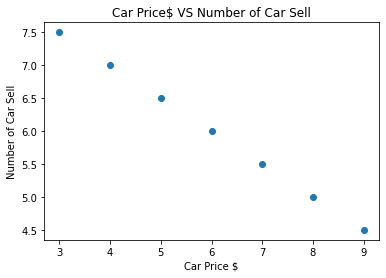

In [12]:
# As a car company we collect this data from previous selling
# lets define car prices
car_prices_array = [3,4,5,6,7,8,9]
car_price_np = np.array(car_prices_array,dtype=np.float32)
car_price_np = car_price_np.reshape(-1,1) # shape (7,1)
car_price_tensor = torch.tensor(car_price_np, requires_grad=True)

# lets define number of car sell
number_of_car_sell_array = [ 7.5, 7, 6.5, 6.0, 5.5, 5.0, 4.5]
number_of_car_sell_np = np.array(number_of_car_sell_array,dtype=np.float32)
number_of_car_sell_np = number_of_car_sell_np.reshape(-1,1)
number_of_car_sell_tensor = torch.tensor(number_of_car_sell_np, requires_grad=True)

# lets visualize our data
import matplotlib.pyplot as plt
plt.scatter(car_prices_array,number_of_car_sell_array)
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Car Price$ VS Number of Car Sell")
plt.show()

epoch 0, loss 7.926371097564697
epoch 50, loss 5.020020961761475
epoch 100, loss 3.3922390937805176
epoch 150, loss 2.292279005050659
epoch 200, loss 1.5489884614944458
epoch 250, loss 1.0467159748077393
epoch 300, loss 0.7073103785514832
epoch 350, loss 0.47795936465263367
epoch 400, loss 0.32297757267951965
epoch 450, loss 0.21824941039085388
epoch 500, loss 0.14748051762580872
epoch 550, loss 0.09965904802083969
epoch 600, loss 0.06734328716993332
epoch 650, loss 0.0455060675740242
epoch 700, loss 0.03075045347213745
epoch 750, loss 0.02077937312424183
epoch 800, loss 0.014041508547961712
epoch 850, loss 0.009488455019891262
epoch 900, loss 0.006411740090698004
epoch 950, loss 0.004332744050770998
epoch 1000, loss 0.002927903551608324


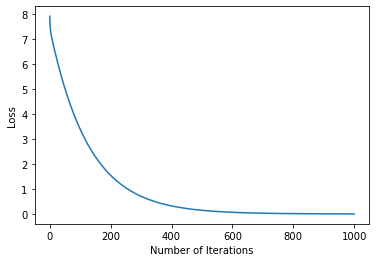

In [13]:
import torch      
#from torch.autograd import Variable     
import torch.nn as nn 
import warnings
#warnings.filterwarnings("ignore")

class LinearRegression(nn.Module):
    def __init__(self,input_size,output_size):
        super().__init__()
        self.linear = nn.Linear(input_dim,output_dim)
    def forward(self,x):
        return self.linear(x)
    
# define model
input_dim = 1
output_dim = 1
model = LinearRegression(input_dim,output_dim) # input and output size are 1

# MSE
mse = nn.MSELoss() #mean square error

# Optimization (find parameters that minimize error)
learning_rate = 0.02   # how fast we reach best parameters
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)#sstochastic 

# train model
loss_list = []
iteration_number = 1001
for iteration in range(iteration_number):
        
    # optimization
    #Pytorch에서는 gradients값들을 추후에 backward를 해줄때 계속 더해주기 때문"에 
    #우리는 항상 backpropagation을 하기전에 gradients를 zero 시작
    #이렇게 gradients을 더해주는 방식은 RNN을 학습시킬때 매우 편리한 방식입니다.
    optimizer.zero_grad() 
    
    # Forward to get output
    results = model(car_price_tensor)
    
    # Calculate Loss
    loss = mse(results, number_of_car_sell_tensor)
    
    # backward propagation
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    # store loss
    loss_list.append(loss.data)
    
        # print loss
    if(iteration % 50 == 0):
        print('epoch {}, loss {}'.format(iteration, loss.data))

plt.plot(range(iteration_number),loss_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.show()

In [82]:
for i in model.named_parameters():
    print(i)

('linear.weight', Parameter containing:
tensor([[-0.4752]], requires_grad=True))
('linear.bias', Parameter containing:
tensor([8.8349], requires_grad=True))


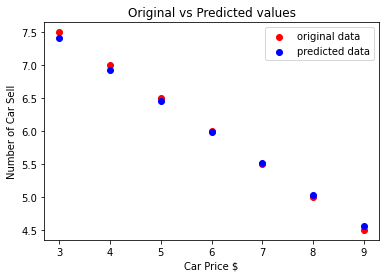

In [14]:
# predict our car price 
predicted = model(car_price_tensor).data.numpy()
plt.scatter(car_prices_array,number_of_car_sell_array,label = "original data",color ="red")
plt.scatter(car_prices_array,predicted,label = "predicted data",color ="blue")

# predict if car price is 10$, what will be the number of car sell
#predicted_10 = model(torch.from_numpy(np.array([10]))).data.numpy()
#plt.scatter(10,predicted_10.data,label = "car price 10$",color ="green")
plt.legend()
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Original vs Predicted values")
plt.show()

In [17]:
model(car_price_tensor).data

tensor([[7.4064],
        [6.9321],
        [6.4577],
        [5.9833],
        [5.5090],
        [5.0346],
        [4.5602]])

In [21]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split

In [22]:
train1 = pd.read_csv("./input/train.csv/train.csv", dtype = np.float32) #MNIST dataset.

train1.label.values # (42000,)

array([1., 0., 1., ..., 7., 6., 9.], dtype=float32)

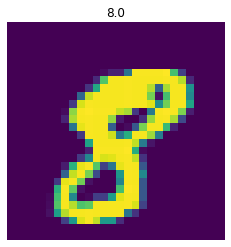

In [23]:
train = pd.read_csv("./input/train.csv/train.csv", dtype = np.float32)

# split data into features(pixels) and labels(numbers from 0 to 9)
targets_numpy = train.label.values
features_numpy = train.loc[:,train.columns != "label"].values/255 # normalization

# train test split. Size of train data is 80% and size of test data is 20%. 
features_train, features_test, targets_train, targets_test = train_test_split(features_numpy,
                                                                             targets_numpy,
                                                                             test_size = 0.2,
                                                                             random_state = 42) 

# create feature and targets tensor for train set. As you remember we need variable to accumulate gradients. Therefore first we create tensor, then we will create variable
featuresTrain = torch.tensor(features_train)
targetsTrain = torch.tensor(targets_train, dtype=torch.long)# data type is long

# create feature and targets tensor for test set.
featuresTest = torch.tensor(features_test)
targetsTest = torch.tensor(targets_test, dtype=torch.long) # data type is long

# batch_size, epoch and iteration
batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

# data loader
train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)

# visualize one of the images in data set
plt.imshow(features_numpy[10].reshape(28,28))
plt.axis("off")
plt.title(str(targets_numpy[10]))
plt.savefig('graph.png')
plt.show()

In [24]:
for i,j in train_loader:
    print(i.shape, j)
    break

torch.Size([100, 784]) tensor([6, 5, 3, 4, 7, 8, 6, 7, 0, 9, 9, 7, 6, 9, 9, 3, 1, 6, 3, 0, 6, 6, 5, 6,
        0, 6, 9, 5, 8, 0, 5, 0, 4, 0, 3, 1, 3, 7, 1, 3, 3, 7, 0, 7, 3, 3, 1, 7,
        8, 8, 2, 4, 0, 6, 6, 1, 5, 0, 4, 4, 8, 6, 0, 7, 6, 3, 4, 2, 6, 7, 6, 8,
        7, 2, 5, 7, 1, 2, 2, 1, 4, 7, 7, 4, 5, 4, 0, 1, 7, 2, 3, 2, 2, 8, 4, 0,
        4, 1, 8, 1])


In [25]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    def forward(self, x):
        out = self.linear(x)
        return out

# Instantiate Model Class
input_dim = 28*28 # size of image px*px
output_dim = 10  # labels 0,1,2,3,4,5,6,7,8,9

# create logistic regression model
model = LogisticRegressionModel(input_dim, output_dim)

# Cross Entropy Loss  
error = nn.CrossEntropyLoss() #CrossEntropyLoss nn.LogSoftmax + nn.NLLLoss

# SGD Optimizer 
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [26]:
# Traning the Model
count = 0
loss_list = []
iteration_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        train = images
        #train = Variable(images.view(-1, 28*28))
        #labels = Variable(labels)
        
        optimizer.zero_grad()
        
        outputs = model(train)
        
        loss = error(outputs, labels)
        
        # Calculate gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        count += 1
        
              # Prediction
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Predict test dataset
            for images, labels in test_loader: 
                test = images
                #test = Variable(images.view(-1, 28*28))
                
                # Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1) #값, index
                
                # Total number of labels
                total += len(labels)
                
                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
                # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
        if count % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {}%'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 1.829874873161316  Accuracy: 68.3452377319336%
Iteration: 1000  Loss: 1.587428092956543  Accuracy: 75.8452377319336%
Iteration: 1500  Loss: 1.2779853343963623  Accuracy: 78.76190185546875%
Iteration: 2000  Loss: 1.1847496032714844  Accuracy: 80.07142639160156%
Iteration: 2500  Loss: 1.0311435461044312  Accuracy: 81.13095092773438%
Iteration: 3000  Loss: 0.9297874569892883  Accuracy: 82.0%
Iteration: 3500  Loss: 0.8920666575431824  Accuracy: 82.53571319580078%
Iteration: 4000  Loss: 0.7575872540473938  Accuracy: 83.22618865966797%
Iteration: 4500  Loss: 0.9698816537857056  Accuracy: 83.52381134033203%
Iteration: 5000  Loss: 0.7995110154151917  Accuracy: 83.91666412353516%
Iteration: 5500  Loss: 0.7548864483833313  Accuracy: 84.29762268066406%
Iteration: 6000  Loss: 0.8577181100845337  Accuracy: 84.70237731933594%
Iteration: 6500  Loss: 0.6536950469017029  Accuracy: 84.85713958740234%
Iteration: 7000  Loss: 0.7118974328041077  Accuracy: 85.0952377319336%
Iteration: 

In [28]:
torch.full((2,3),True).sum()

tensor(6)

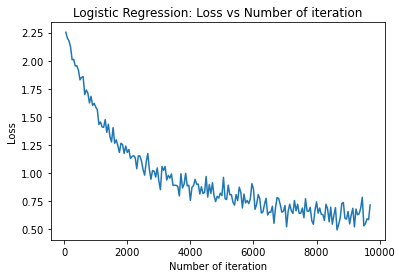

In [29]:
# visualization
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("Logistic Regression: Loss vs Number of iteration")
plt.show()

In [30]:
# Create ANN Model
class ANNModel(nn.Module):
    
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ANNModel, self).__init__()
        
        # Linear function 1: 784 --> 150
        self.fc1 = nn.Linear(input_dim, 200) 
        # Non-linearity 1
        self.relu1 = nn.ReLU()
        
        # Linear function 2: 150 --> 150
        self.fc2 = nn.Linear(200, hidden_dim)
        # Non-linearity 2
        self.tanh2 = nn.Tanh()
        
        # Linear function 3: 150 --> 150
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 3
        self.elu3 = nn.ELU()
        
        # Linear function 4 (readout): 150 --> 10
        self.fc4 = nn.Linear(hidden_dim, output_dim)  
    
    def forward(self, x):
        # Linear function 1
        out = self.fc1(x)
        # Non-linearity 1
        out = self.relu1(out)
        
        # Linear function 2
        out = self.fc2(out)
        # Non-linearity 2
        out = self.tanh2(out)
        
        # Linear function 2
        out = self.fc3(out)
        # Non-linearity 2
        out = self.elu3(out)
        
        # Linear function 4 (readout)
        out = self.fc4(out)
        return out

# instantiate ANN
input_dim = 28*28
hidden_dim = 150 #hidden layer dim is one of the hyper parameter and it should be chosen and tuned. For now I only say 150 there is no reason.
output_dim = 10

# Create ANN
model = ANNModel(input_dim, hidden_dim, output_dim)

# Cross Entropy Loss 
error = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [31]:
# ANN model training
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        train = images
        #train = Variable(images.view(-1, 28*28))
        #labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        
        # Calculate softmax and ross entropy loss
        loss = error(outputs, labels)
        
        # Calculating gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        count += 1
        
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Predict test dataset
            for images, labels in test_loader:
                
                test = images
                #test = Variable(images.view(-1, 28*28))
                
                # Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)

                # Total correct predictions
                correct += (predicted == labels).sum()
                
                accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        if count % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 0.7767808437347412  Accuracy: 80.16666412353516 %
Iteration: 1000  Loss: 0.46434175968170166  Accuracy: 87.91666412353516 %
Iteration: 1500  Loss: 0.20938701927661896  Accuracy: 89.86904907226562 %
Iteration: 2000  Loss: 0.28663161396980286  Accuracy: 90.91666412353516 %
Iteration: 2500  Loss: 0.3143083453178406  Accuracy: 92.20237731933594 %
Iteration: 3000  Loss: 0.11036672443151474  Accuracy: 92.91666412353516 %
Iteration: 3500  Loss: 0.23445191979408264  Accuracy: 93.66666412353516 %
Iteration: 4000  Loss: 0.060708679258823395  Accuracy: 94.41666412353516 %
Iteration: 4500  Loss: 0.28838130831718445  Accuracy: 94.61904907226562 %
Iteration: 5000  Loss: 0.09961583465337753  Accuracy: 94.97618865966797 %
Iteration: 5500  Loss: 0.17647914588451385  Accuracy: 95.16666412353516 %
Iteration: 6000  Loss: 0.16529728472232819  Accuracy: 95.3452377319336 %
Iteration: 6500  Loss: 0.09668204933404922  Accuracy: 95.60713958740234 %
Iteration: 7000  Loss: 0.0995066538453102

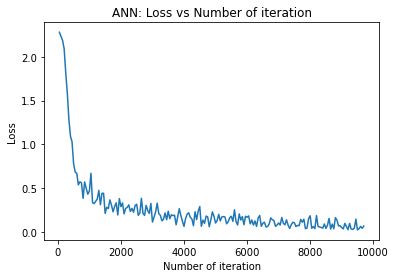

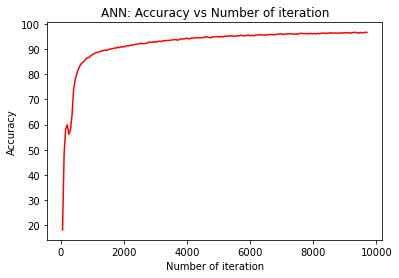

In [32]:
# visualization loss 
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("ANN: Accuracy vs Number of iteration")
plt.show()

In [35]:
# Create CNN Model
class CNNModel(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Convolution 1
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=0)
        self.relu1 = nn.ReLU() # (28-5+2*padding)/stride + 1
                               # 배치 크기 × 채널 × 높이(height) × 너비(widht)
                               # 100 x 1 x 28 x 28 > 100 x 16 x 24 x 24
        # Max pool 1
        self.maxpool1 = nn.MaxPool2d(kernel_size=2) # 100 x 16 x 12 x 12
     
        # Convolution 2
        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=0)
        self.relu2 = nn.ReLU()        # 100 x 32 x 8 x 8
        
        # Max pool 2
        self.maxpool2 = nn.MaxPool2d(kernel_size=2) # 100 x 32 x 4 x 4 
        
        # Fully connected 1
        self.fc1 = nn.Linear(32 * 4 * 4, 10) 
        
    def forward(self, x):
        # Convolution 1
        out = self.cnn1(x)
        out = self.relu1(out)

        # Max pool 1
        out = self.maxpool1(out)

        # Convolution 2 
        out = self.cnn2(out)
        out = self.relu2(out)

        # Max pool 2 
        out = self.maxpool2(out)

        # flatten
        out = out.view(out.size(0), -1)

        # Linear function (readout)
        out = self.fc1(out)

        return out
    
    # batch_size, epoch and iteration
batch_size = 100
n_iters = 2500
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

# data loader
train_loader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = False)
    
# Create CNN
model = CNNModel()

# Cross Entropy Loss 
error = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [36]:
for i in train_loader:
    print(i[0].shape)
    break

torch.Size([784])


In [37]:
# CNN model training
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        train = images.view(100,1,28,28)
        #train = Variable(images.view(100,1,28,28))
        #labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        
        # Calculate softmax and ross entropy loss
        loss = error(outputs, labels)
        
        # Calculating gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        count += 1
        
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                
                test = images.view(100,1,28,28)
                #test = Variable(images.view(100,1,28,28))
                
                # Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)
                
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        if count % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))
        
        

D:\anaconda\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Iteration: 500  Loss: 0.10248791426420212  Accuracy: 96.53571319580078 %
Iteration: 1000  Loss: 0.0421527735888958  Accuracy: 97.61904907226562 %
Iteration: 1500  Loss: 0.04630650207400322  Accuracy: 97.47618865966797 %
Iteration: 2000  Loss: 0.01666056178510189  Accuracy: 98.17857360839844 %


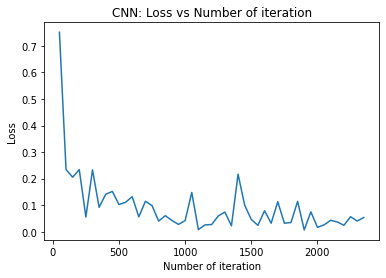

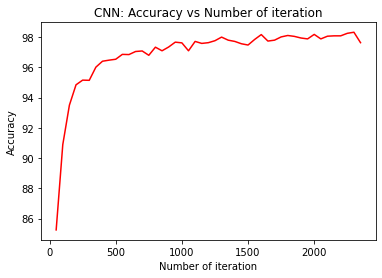

In [38]:
# visualization loss 
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("CNN: Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("CNN: Accuracy vs Number of iteration")
plt.show()